# Корреляция

In [1]:
# раскомментирвоть (убрать символ #) строки ниже для установки модулей в mybinder.org
#!pip install scipy
#!pip install seaborn
#!pip install pandas

In [2]:
import pandas as pd     # для загрузки и хранения данных в таблице (DataFrame)
import seaborn          # для построения графиков
from matplotlib.pyplot import *   # для построения графиков

from scipy.stats import linregress, pearsonr, normaltest  # для построения уравнения регрессии
import numpy as np

## Пример 1
Поглощение звука материалами в зависимости от их свойств (толщина, масса, жесткость и др.)

Источник данных: 
http://users.stat.ufl.edu/~winner/datasets.html


Описание данных:

Description: Acoustic absorption coefficients of 24 woven fabrics
with different air gap distances (d=0,1,2,3,cm)

Responses: 

- acoustic0  (d=0 cm)
- acoustic1
- acoustic2
- acoustic3


Predictors:

- thickness   (mm)
- diameter    (mm)
- perforation (%)
- weight      (g/m^2)
- stiffness   (mN x cm)
- airPerm     (air permeability, mm/s) 

In [3]:
# загрузка данных из файла fabricsoundabsorb.csv 
# это текстовый файл с данными расположеными в столбцах
# header = 0 - заголовок для столбцов это нелувая (персвая посчёту строка)
# comment='#' решеткой в начале строки помечаны дополнительная, справочная, информация
# в файле, они будут проигнорированы при загрузке.

# Примечание для выполнения работ.
# данные для вариантов находятся в папке task2/data
# эти файлы достыпны по ссылке: "../../task2/data/data1-v0.csv" 
# (после v подставить номер своего варианта)

# data = pd.read_csv("fabricsoundabsorb.csv", comment='#', header=0)
data = pd.read_csv("../../task2/data/data1-v0.csv", comment='#', header=0)

# данные будут загружены в переменную data

In [4]:
# В mybinder.org файлы могут быть недоступны,
# тогда записать данные в переменную data можно скопировав их из файла.


# ниже приведён пример записи данных в переменную
# все данные записываются в квадратных скобках, 
# каждая строчка из файла (нужно отключить перенос строк при показе) ещё в одних в квадратных скобках
# нужно раскомментировать (убрать символ #) стрОки ниже, чтобы программа выполнилась

# d = [ [1213, 21241, 31412, 41242],
#       [623,  14324, 231,   12123]]
 
# data = pd.DataFrame( d )

In [5]:
# напечатаем эти данные
data

,Unnamed: 0,var0,var1,var2,var3,var4,var5
0,0,-38.950232,40.910445,11.708872,32.375613,-45.139528,-36.448874
1,1,-42.514483,42.268866,-6.690043,27.162719,-42.376453,-36.623828
2,2,-40.321773,46.502823,17.413483,28.343640,-30.050097,-32.942213
3,3,-42.332766,46.251360,9.414176,14.432018,-39.959943,-41.076794
4,4,-40.162429,42.318728,21.403761,24.338764,-25.673873,-37.863466
5,5,-41.428586,33.266302,19.359881,28.579866,-31.654909,-38.969574
6,6,-41.967747,43.845425,3.908288,24.948509,-37.983455,-38.502725
7,7,-37.476525,44.835091,5.122090,34.949172,-28.077212,-33.557349
8,8,-33.824569,37.374834,8.092510,20.245029,-26.377389,-32.724306
9,9,-34.545885,40.518092,22.914841,14.084034,-26.756516,-27.833670


Загруженные данные -- это таблица.

Столбец  sampleID -- это номер образца материала. Для вычисления КК это число бесполезно, поэтому удалим столбец из таблицы.



In [7]:
data = data.drop(columns=['Unnamed: 0'])

In [8]:
# завново напечатем данные, но только первые 10 строк
data.head()

,var0,var1,var2,var3,var4,var5
0,-38.950232,40.910445,11.708872,32.375613,-45.139528,-36.448874
1,-42.514483,42.268866,-6.690043,27.162719,-42.376453,-36.623828
2,-40.321773,46.502823,17.413483,28.343640,-30.050097,-32.942213
3,-42.332766,46.251360,9.414176,14.432018,-39.959943,-41.076794
4,-40.162429,42.318728,21.403761,24.338764,-25.673873,-37.863466


### Корреляционный анализ

**Корреляционный анализ** — метод обработки статистических данных, с помощью которого измеряется теснота связи между двумя или более переменными.

**Корреляционный анализ** — метод обработки статистических данных, заключающийся в изучении коэффициентов корреляции между переменными. 

Вычислим и выведем коэффициенты корреляции для каждого столбца таблицы с каждым.
Нижеприведенная таблица называется **матрицей корреляции**.

In [9]:
data.corr()

,var0,var1,var2,var3,var4,var5
var0,1.000000,-0.016439,0.216914,-0.307407,0.036891,0.777362
var1,-0.016439,1.000000,-0.175649,-0.098361,0.102843,0.065760
var2,0.216914,-0.175649,1.000000,-0.028766,0.261499,0.226636
var3,-0.307407,-0.098361,-0.028766,1.000000,0.089344,-0.193938
var4,0.036891,0.102843,0.261499,0.089344,1.000000,0.114291
var5,0.777362,0.065760,0.226636,-0.193938,0.114291,1.000000


Рассмотрим например корреляцию между коэф. поглощения звука (acoustic1) и толщиной материала (thickness): пересечение строки thickness и столбца acoustic1, КК  0.613085.

- Коэффициент корреляции отличается от нуля, значит существует зависимость между поглощением звука и толщиной материала. 
- КК положителен, значит эта зависимость прямая
- Далее будем обозначать КК буквой **r**.


Аналогичным способом можно делать и выводы о кореляции других величин друг от друга.

Однако можно представить матрицу корреляции и нагляднее. Построим тепловую карту, обозначив величину КК цветом.

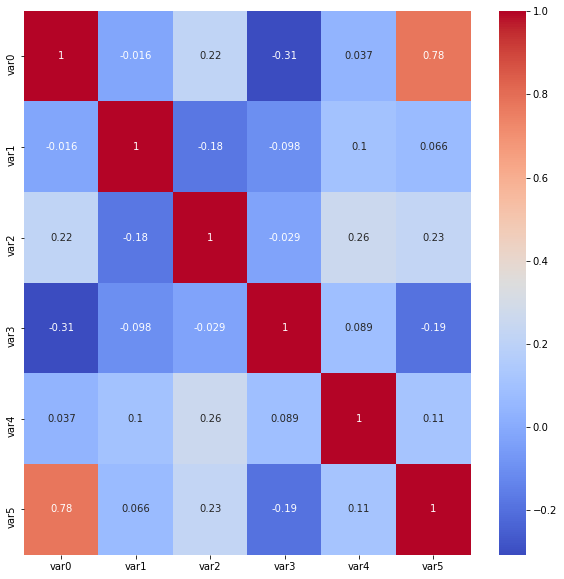

In [10]:
figure( figsize=(10,10))  # размер графика - 10х10 едениц
seaborn.heatmap( data.corr(),
                cmap='coolwarm',  # способ цветового кодирования: холодные и тёплые цвета
                annot=True)  # annot=True - показывать не только цвета, но и величну КК

Теперь рассмотрим корреляцию между толщиной материала и коэф. звукопоглощения отдельно.

Построим диаграмму рассеивания. Точки на этой диаграмме - это отдельные измерения соответствующих величин.

In [ ]:
seaborn.jointplot(data=data,  # используемые данные
                  x="thickness", y='acoustic1', # какой столбец по какой оси озобразить
                  kind='reg')  # reg - изобразить линию регрессии

- Точки на графики - это пары значений (thickness и acoustic1)
- Каздая пара значений взята из одной строчки таблицы data. Одна строка таблицы - это одно испытание на звукопоглощение.
- На графике видно, что большинство значений грубо подходят под проведённую линию. 
- Эта линия называется **линией регрессии**
- Чем ближе КК к 1 или -1, тем больше точек лежит на линии регрессии

#### Гипотеза о равенстве КК нулю

- Однако, экспериментальные данные - это всего лишь выборка, потому, что исследуется только небольшая часть из всех материалов. Поэтому есть шанс, что полученная зависимость между исследуемыми величинами случайна.

- Требуется убедится, что зависимость есть не только в выборке но и в генеральной совокупности.

- При построении графика заодно проверяется гипотеза (нулевая гипотеза) о равенстве КК нулю. 
    - $H_0: r = 0$

- Если это равенство подтвердится, значит полученное значение КК получилось именно таким случайно. 

- Для проверки гипотезы вычисляется p-value. Правило для принятия нулевой гипотезы: 
    - p-value > 0.05 - нулевая гипотеза принимается.
    - p-value < 0.05 - нулевая гипотеза отвергается.



В примере выше: p-value = 0.0014 < 0.05.
Отвергаем нулевую гипотезу о равенстве КК нулю. КК статистически значим. Поэтому будем считать, что такое же значение КК справедливо и для выборки.


Просмотрим справку по функции, вычисляющей коэффицент корреляции и p-value

In [ ]:
help(pearsonr)

In [11]:
# вычислим коэффициент корреляции и p-value
pearsonr( data["var5"], data["var0"])

(0.7773619317320645, 3.646240303255737e-09)

В примере выше: p-value = 0.0014 < 0.05.
Отвергаем нулевую гипотезу о равенстве КК нулю. КК статистически значим. Поэтому будм считать, что такое же значение КК справделиво и для выборки.


***
Для примера построим ещё и диаграмму рассеивания для величин поглощение звука (acoustic1) и жёсткость (stiffness)

In [ ]:
seaborn.jointplot(data=data, x="stiffness", y="acoustic1", kind='reg')

ValueError: Could not interpret input 'stiffness'

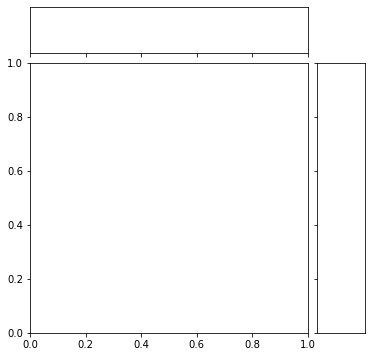

In [12]:
seaborn.jointplot(data=data, x="stiffness", y="acoustic1", kind='reg')

- Здесь точки разбросаны более хаотично, трудно провести линию регрессии, которая подходила бы большинству точек.
- Поэтому и КК близок к нулю.
- Значит здесь нет заметной статистической зависимости
- Это подтверждается проверкой гипотезы о равенстве КК нулю: p-value > 0.05. Значит нет оснований отклонить нулевую гипотезу $H_0: r=0$

## Регрессионный анализ
**Регрессионный анализ** — статистический метод исследования влияния одной или нескольких независимых переменных $X_1 , X_2 , ... , X_n$ на зависимую переменную Y.


- найти функцию, которая отображает зависимость одних переменных или данных от других
    - Y = f(x_1, x_2, ..., x_3)
- функция строится на основе известных значений переменных
- Регрессия полезна для прогнозирования ответа на новые условия





Отличия регрессионного анализа от корреляционного:
- в корреляционном анализе важен коэффициент корреляции
- в регрессионном анализе важно уравнение регрессии, т.е. предсказание значений зависимой переменной

In [ ]:
linregress(data['airPerm'], data['acoustic1'])

Уравнение будет иметь вид:
$$ acoustic1 = slope \cdot airPerm + intercept $$


Теперь им можно пользоватся, чтобы предсказать *среднее* значение *acoustic1*, для заданного значения *airPerm* (и при фиксированых значениях остальных переменных)

In [ ]:
# например вычислим коэф. звукопоглощения1 (acoustic1)
# для воздухопроницаемости airPerm 950 mm/s
-0.0005196861386681389 * 950 + 0.7918330758205965

In [ ]:
# построим диаграмму рассеивания и линию регрессии
seaborn.jointplot(data['airPerm'], data['acoustic1'], kind='reg')

# отметим предсказанное значение коэф. звукопоглощения
plot(950, 0.2981312440858645, 'o')
grid()

# Пример 2

Concrete Compressive Strength 

---------------------------------

Data Type: multivariate
 
Abstract: Concrete is the most important material in civil engineering. The 
concrete compressive strength is a highly nonlinear function of age and 
ingredients. These ingredients include cement, blast furnace slag, fly ash, 
water, superplasticizer, coarse aggregate, and fine aggregate.

---------------------------------

Sources: 

  Original Owner and Donor
  Prof. I-Cheng Yeh
  Department of Information Management 
  Chung-Hua University, 
  Hsin Chu, Taiwan 30067, R.O.C.
  e-mail:icyeh@chu.edu.tw
  TEL:886-3-5186511

  Date Donated: August 3, 2007
 
---------------------------------

Data Characteristics:
    
The actual concrete compressive strength (MPa) for a given mixture under a 
specific age (days) was determined from laboratory. Data is in raw form (not scaled). 

Summary Statistics: 

Number of instances (observations): 1030
Number of Attributes: 9
Attribute breakdown: 8 quantitative input variables, and 1 quantitative output variable
Missing Attribute Values: None

---------------------------------

Variable Information:

Given is the variable name, variable type, the measurement unit and a brief description. 
The concrete compressive strength is the regression problem. The order of this listing 
corresponds to the order of numerals along the rows of the database. 

Name -- Data Type -- Measurement -- Description

- Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
- Blast Furnace Slag (доменный шлак, component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
- Fly Ash (Летучая зола, component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
- Water (вода, component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
- Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
- Coarse Aggregate (заполнитель, component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
- Fine Aggregate (мелкий заполнитель, component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
- Age (время отведённое на завтердевание) -- quantitative -- Day (1~365) -- Input Variable
- Concrete compressive strength (прочность на сжатие) -- quantitative -- MPa -- Output Variable 

---------------------------------

Acknowledgements, Copyright Information, and Availability:

NOTE: Reuse of this database is unlimited with retention of copyright notice for 
Prof. I-Cheng Yeh and the following published paper:

I-Cheng Yeh, "Modeling of strength of high performance concrete using artificial 
neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998)





In [ ]:
data2 = pd.read_csv("Concrete_Data.csv", header=0, comment='#', delimiter=';')
# здесь один столбец отделён от другого точкой с запятой (;), а не запятой, 
# поэтому чтобы данные загрузились корректно, укажем разделитель: delimiter=';'

In [ ]:
# названия столбцов очень длинные, поэтому заменим на короткие
cols = data2.columns.values
cols[0] = "component1"
cols[1] = "component2"
cols[2] = "component3"
cols[3] = "component4"
cols[4] = "component5"
cols[5] = "component6"
cols[6] = "component7"
cols[7] = "age"
cols[8] = "strength"
data2.columns = cols

In [ ]:
# удалим последний столбец, он без данных
data2 = data2.drop(columns=['Unnamed: 9'])

In [ ]:
data2.head()

In [ ]:
data2.info()

In [ ]:
figure( figsize=(10,10) )
seaborn.heatmap( data2.corr(), cmap='coolwarm', annot = True )

- Какие части бетонной смеси сильнее всего влияет на его прочность после застывания?
- Где зависимость прямая, а где обратная?
- Есть ли компоненты смеси, которые мало влияют на прочность?
- Как влияет время застывания смеси на прочность бетона?
- Как влияет количество воды в смеси на время застывания?

## Пример 3. Анализ зависимых выборок

[зависимые и независимые выборки (wikipedia)](https://ru.wikipedia.org/wiki/%D0%92%D1%8B%D0%B1%D0%BE%D1%80%D0%BA%D0%B0#%D0%97%D0%B0%D0%B2%D0%B8%D1%81%D0%B8%D0%BC%D1%8B%D0%B5_%D0%B8_%D0%BD%D0%B5%D0%B7%D0%B0%D0%B2%D0%B8%D1%81%D0%B8%D0%BC%D1%8B%D0%B5_%D0%B2%D1%8B%D0%B1%D0%BE%D1%80%D0%BA%D0%B8)


In [ ]:
# рассмотрим две зависимые выборки
X = [4.61, 6.42, 5.40, 4.54, 3.98, 3.82, 5.01, 4.34, 3.80, 4.56, 5.35, 3.89, 2.25, 4.24]
Y = [3.84, 5.57, 5.85, 4.80, 3.68, 2.96, 4.41, 3.72, 3.49, 3.84, 5.26, 3.73, 1.84, 4.14]

# видно, что значения попарно различаются
# но насколько статистически значимо это различие?

### Проверка на нормальность

In [ ]:
# для начала всех проверок нужно убедится, что выборки сделаны из ген. совокупности с нормальным распределением
normaltest(X)

In [ ]:
normaltest(Y)

normaltest проверяет $H_0$: выборка сделана из нормально распределённой генеральной совокупности.
оба p-value получились больше 0.05, поэтому принимаем $H_0$

In [ ]:
# спарвка по nornaltest
#help(normaltest)

Выборочные данные могут не слишком хорошо описывать генеральную совокупность.
Поэтому проверим, равны ли средние по выборкам средним в генеральных совокупностях

In [ ]:
from scipy.stats import wilcoxon
from matplotlib.pyplot import*

### Диаграммы размаха

In [ ]:
figure( figsize=(5,10) )
data = pd.DataFrame({'X':X, 'Y':X})
grid()
seaborn.boxplot(x="variable", y="value", data=pd.melt(data))

### Доверительные интервалы
Оценивать среднее значение в генеральной совокупности по среднему в воборке трудно. Разброс значений величины может быть большим, и не понятно на сколько средняя по выборке может отклонится от средней по значению.



Чтобы учесть разброс вычислим *доверительный интервал* для среднего - интервал, в который попадает среднее по генеральной совокупности с достаточно большой вероятностью. Эта вероятность называется *надёжностью*.

Зададим надёжность равной 0.95.

Будем определять доверительный для математического ожидания ген. совокупности интервал так:

$$ ( \bar x - delta, \bar x + delta )$$

где $\bar x$ - среднее по выборке, $delta$ - половина ширины  интервала.


Тогда вероятность попадания математического ожидания ($M(X)$) генеральной совокупности в доверительный интервал запишем так:


$$ P( \bar x - delta < M(X) < \bar x + delta) $$

Чтобы получить левую и правую границу интервала отступим влево и вправо от среднего по выборке.
Величина отступа определяется так: 
$$ delta = \frac{\sigma}{\sqrt{n}} \cdot t $$

гдн n - объём выборки, $\sigma$ - стандартное отклонение по выборке, t - величина связанная с надёжностью, $t = arg( \int \limits_{0}^{t} S(t,n) dt = 0.95 / 2) $


S(t,n) - распределение Стьюдента. t можно вычислить используя калькулятор [Probability Distributions](https://play.google.com/store/apps/details?id=com.mbognar.probdist):
- выбрать t распределение (распределение Стьюдента)
- v = n
- x = t - не задаётся,
- P(X<x) = 0.5 - 0.95/2 = 0.25 (площадь под графиком должна быть закрашена слева)

In [ ]:
# вычисление t

from scipy.stats import t
t.isf(0.5 - 0.95/2, 10000)  # вычисляет значение t по функции распределения Стьюдента

In [ ]:
#левая граница интервала
np.mean(X) - np.std(X) / len(X)**0.5 * 1.96

In [ ]:
#правая граница интервала
np.mean(X) + np.std(X) / len(X)**0.5 * 1.96

Математическое ожидание генеральной совокупности, из которой была сделана выборка X с вероятностью 0.95 лежит в интервале 
$$ (3.955, 4.932) $$

### Тест Уилкиксона: выборки сделаны из одного и того же распределения?
Эта проверка показывает, что генеральные совокупности из которых сделаны выборки совпадают. То есть выборки статистически неразличимы.

In [ ]:
wilcoxon(X,Y)

p-value < 0.05, отвергаем нулевую гипотезу о равенстве выборок.

*стоит заметить, что в зависимости от цены ошибки иногда уровень значимости уменьшают, например вместо 0.05 используют 0.01. Тогда бы в рассмотренном случае нулевую гипотезу пришлось бы принять*

# Вопросы
1. Что такое выборка? Что такое генеральная совокупность?
2. Что такое корреляция?
3. Что такое коэффициент корреляции (линейный)?
4. Что такое статистическая гипотеза?
5. Что такое p-v). alue? Как это значение используется для проверки гипотез?
6. Почему нужно проверять гипотезу о равенстве коэффициента корреляции генеральной совокупности нулю?
7. Что такое диаграмма размаха?
8. Что такое матрица корреляции?
9. Что такое доверительный интервал для математического ожидания? От чего зависит его ширина?